For organizational purposes, all the data used for training SIR models on this
Colab uses data in the US as a whole

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

## Variants (Need to Update)

In [ ]:
# Read from now deprecated variants database
df = pd.read_csv('https://raw.githubusercontent.com/USATODAY/covid-variants/master/!combined.csv')

In [ ]:
# Parse
df.columns = ['Date', 'State', 'B.1.1.7', 'P.1', 'B.1.351', 'Total']
dates = list(set(df['Date'].to_list()))
dates.sort()

data_per_date = {}
for date in dates:
  data_per_date[date] = df[df['Date'] == date]
  data_per_date[date] = data_per_date[date].reset_index(drop=True)

In [ ]:
states = list(set(df['State'].to_list()))
states.sort()

var_totals = {}
for date in dates:
  b117 = 0
  p1 = 0
  b351 = 0
  day = data_per_date[date]
  for state in states:
    b117 += int(day[day['State'] == state]['B.1.1.7'])
    p1 += int(day[day['State'] == state]['P.1'])
    b351 += int(day[day['State'] == state]['B.1.351'])
  var_totals[date] = (b117, p1, b351)

## General Vaccine Number

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

In [ ]:
us_df = df[df['location'] == 'United States']

dates = list(set(us_df['date'].to_list()))
dates.sort()

vaccine_data_per_date = {}
for date in dates:
  day = us_df[us_df['date'] == date]
  if np.isnan(day['total_vaccinations'].item()):
    continue
  vaccine_data_per_date[date] = int(day['total_vaccinations'])


## Total Covid Cases

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
463,2021-04-28,32258020,573900
464,2021-04-29,32315986,574777
465,2021-04-30,32374368,575635
466,2021-05-01,32419050,576337


In [ ]:
dates = list(set(df['date'].to_list()))
dates.sort()

case_data_per_date = {}
for date in dates:
  day = df[df['date'] == date]
  case_data_per_date[date] = int(day['cases'])

## Convert to Time Series for SIR Model

In [ ]:
# Start Date for data recording
from datetime import datetime
from datetime import date

start_date = date(2021, 2, 1)

In [ ]:
vac_t = {}

for date in vaccine_data_per_date:
  cur_date = datetime.strptime(date, "%Y-%m-%d").date()
  diff = cur_date - start_date
  vac_t[diff.days] = vaccine_data_per_date[date]

print(vac_t)

{-43: 556208, -42: 614117, -40: 1008025, -37: 1944585, -35: 2127143, -33: 2794588, -30: 4225756, -28: 4563260, -27: 4836469, -26: 5306797, -25: 5919418, -24: 6688231, -21: 8987322, -20: 9327138, -19: 10278462, -18: 11148991, -17: 12279180, -13: 15707588, -12: 16525281, -11: 17546374, -10: 19107959, -9: 20537990, -8: 21848655, -7: 22734243, -6: 23540994, -5: 24652634, -4: 26193682, -3: 27884661, -2: 29577902, -1: 31123299, 0: 32222402, 1: 32780860, 2: 33878254, 3: 35203710, 4: 36819212, 5: 39037964, 6: 41210937, 7: 42417617, 8: 43206190, 9: 44769970, 10: 46390270, 11: 48410558, 12: 50641884, 13: 52884356, 15: 55220364, 16: 56281827, 17: 57737767, 18: 59585043, 19: 61289500, 20: 63090634, 21: 64177474, 22: 65032083, 23: 66464947, 24: 68274117, 25: 70454064, 26: 72806180, 27: 75236003, 28: 76899987, 29: 78631601, 30: 80540474, 31: 82572848, 32: 85008094, 33: 87912323, 34: 90351750, 35: 92089852, 36: 93692598, 37: 95721290, 38: 98203893, 39: 101128005, 40: 105703501, 41: 107060274, 42: 109

In [ ]:
var_t = {}

for date in var_totals:
  cur_date = datetime.strptime(date, "%Y-%m-%d").date()
  diff = cur_date - start_date
  var_t[diff.days] = var_totals[date]

print(var_t)

{-24: (63, 0, 0), -20: (72, 0, 0), -18: (76, 0, 0), -13: (122, 0, 0), -12: (144, 0, 0), -11: (144, 0, 0), -10: (195, 0, 0), -9: (195, 0, 0), -8: (195, 0, 0), -7: (293, 0, 0), -6: (293, 0, 0), -5: (315, 0, 0), -4: (315, 0, 0), -3: (434, 1, 2), -2: (434, 1, 2), -1: (467, 1, 3), 0: (467, 1, 3), 1: (541, 2, 3), 2: (541, 2, 3), 3: (611, 2, 5), 4: (611, 2, 5), 5: (611, 2, 5), 6: (690, 3, 6), 7: (690, 3, 6), 8: (932, 3, 9), 9: (932, 3, 9), 10: (981, 3, 13), 11: (981, 3, 13), 12: (981, 3, 13), 13: (1173, 3, 17), 14: (1173, 3, 17), 15: (1278, 3, 19), 16: (1278, 3, 19), 17: (1523, 5, 21), 18: (1523, 5, 21), 19: (1523, 5, 21), 20: (1661, 5, 22), 21: (1661, 5, 22), 22: (1881, 5, 46), 23: (1881, 5, 46), 24: (2102, 6, 49), 25: (2102, 6, 49), 26: (2102, 6, 49), 27: (2400, 10, 53), 28: (2400, 10, 53), 29: (2506, 10, 65), 30: (2506, 10, 65), 31: (2672, 13, 68), 32: (2672, 13, 68), 33: (2672, 13, 68), 34: (3037, 15, 81), 35: (3037, 15, 81), 36: (3283, 15, 91), 37: (3283, 15, 91), 38: (3701, 17, 108), 39

In [ ]:
cases_t = {}

for date in case_data_per_date:
  cur_date = datetime.strptime(date, "%Y-%m-%d").date()
  diff = cur_date - start_date
  cases_t[diff.days] = case_data_per_date[date]

print(cases_t)

{-377: 1, -376: 1, -375: 1, -374: 2, -373: 3, -372: 5, -371: 5, -370: 5, -369: 5, -368: 6, -367: 7, -366: 8, -365: 11, -364: 11, -363: 11, -362: 12, -361: 12, -360: 12, -359: 12, -358: 12, -357: 13, -356: 13, -355: 14, -354: 15, -353: 15, -352: 15, -351: 15, -350: 25, -349: 25, -348: 25, -347: 27, -346: 30, -345: 30, -344: 30, -343: 43, -342: 45, -341: 60, -340: 60, -339: 65, -338: 70, -337: 88, -336: 104, -335: 125, -334: 161, -333: 228, -332: 311, -331: 428, -330: 547, -329: 748, -328: 1018, -327: 1263, -326: 1668, -325: 2224, -324: 2898, -323: 3600, -322: 4507, -321: 5906, -320: 8350, -319: 12393, -318: 18012, -317: 24528, -316: 33073, -315: 43505, -314: 53938, -313: 68572, -312: 85570, -311: 102900, -310: 123966, -309: 142486, -308: 163955, -307: 188461, -306: 215391, -305: 245108, -304: 277426, -303: 312525, -302: 338141, -301: 369057, -300: 399394, -299: 431214, -298: 465913, -297: 499386, -296: 531106, -295: 558249, -294: 584018, -293: 610709, -292: 640742, -291: 672355, -290: 7

In [ ]:
case_c_t = {}

for v in var_t:
  if v < 0:
    continue
  cases = cases_t[v]
  case_c_t[v] = cases_t[v] - sum(var_t[v])

print(case_c_t)

{0: 26365734, 1: 26483569, 2: 26603809, 3: 26729656, 4: 26859261, 5: 26964216, 6: 27051417, 7: 27144483, 8: 27240729, 9: 27335728, 10: 27441347, 11: 27541000, 12: 27625690, 13: 27689289, 14: 27744611, 15: 27809126, 16: 27879336, 17: 27950967, 18: 28029066, 19: 28098810, 20: 28153868, 21: 28213399, 22: 28285100, 23: 28359289, 24: 28436918, 25: 28515216, 26: 28577917, 27: 28628536, 28: 28685282, 29: 28742981, 30: 28809721, 31: 28876946, 32: 28942730, 33: 28999316, 34: 29039065, 35: 29133579, 36: 29189304, 37: 29247629, 38: 29309721, 39: 29374064, 40: 29423645, 41: 29460781, 42: 29518024, 43: 29572509, 44: 29631463, 45: 29691130, 46: 29751851, 47: 29806271, 48: 29839654, 49: 29894512, 50: 29950237, 51: 30030148, 52: 30098567, 53: 30173225, 54: 30233913, 55: 30276136, 56: 30346935, 57: 30408229, 58: 30476315, 59: 30552628, 60: 30621203, 61: 30685281, 62: 30718994, 63: 30795847, 64: 30857024, 65: 30930213, 66: 31007443, 67: 31089028, 68: 31153744, 69: 31200322, 70: 31272573, 71: 31350019, 7

## Curve Fit Vaccinations

Fit vaccine cumulative curve to logistic function.

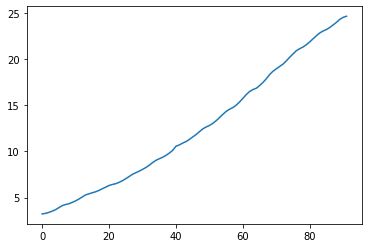

In [ ]:
x = list(filter(lambda x: x >= 0, [v for v in vac_t]))
y = [vac_t[v] / 1e7 for v in x]
plt.plot(x, y)
plt.show()

[6.41830862e+01 3.70483692e-02 7.69727240e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


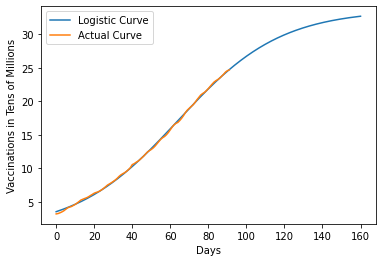

3.5553308761734677

In [ ]:
from scipy.optimize import curve_fit

n = 32.82

def logifunc(x, x0, k, off):
  return n / (1 + np.exp(-k*(x-x0))) + off

fit = curve_fit(logifunc, x, y, p0=[10, 10, 1.2e7])
print(fit[0])

xs = np.linspace(0, 160, 400)
ys = [logifunc(x, fit[0][0], fit[0][1], fit[0][2]) for x in xs]
plt.plot(xs, ys)
plt.plot(x, y)
plt.legend(['Logistic Curve', 'Actual Curve'])
plt.ylabel('Vaccinations in Tens of Millions')
plt.xlabel('Days')
plt.show()

vac_fit = fit[0]
logifunc(0, vac_fit[0], vac_fit[1], vac_fit[2])

In [ ]:
def vaccine_curve(t):
  return 1e7 * logifunc(t, vac_fit[0], vac_fit[1], vac_fit[2])

def num_vac_slope(t, delta=1):
  return (vaccine_curve(t + delta) - vaccine_curve(t)) / (delta)

print(num_vac_slope(0))

959068.2497491613


In [ ]:
from scipy.integrate import odeint

# Initial Conditons

In [ ]:
N = 32.82e7

# Difference with total cases 7 days before to get number of infected
num = 10
closest_var_value_before = var_t.get(-num, var_t[min(var_t.keys(), key=lambda k: abs(k-num))])
closest_var_value_cur = var_t.get(0, var_t[min(var_t.keys(), key=lambda k: abs(k))])
cur_vars = []
for i in range(len(closest_var_value_cur)):
  cur_vars.append(closest_var_value_cur[i] - closest_var_value_before[i])

# At least one case needs to be out there or else model will never predict any
IB17_0 = max(cur_vars[0], 1)
IP_0 = max(cur_vars[1], 1)
IB351_0 = max(cur_vars[2], 1)
print("Variants")
print(IB17_0, IP_0, IB351_0)

# Recovered from each variant must then be the rest
print("Recovered Variants")
RB17_0 = closest_var_value_before[0]
RP_0 = closest_var_value_before[1]
RB351_0 = closest_var_value_before[2]
print(RB17_0, RP_0, RB351_0)

# Get generic variants by subtracting out special variants from total cases
IN_0 = cases_t[0] - cases_t[-num]
IN_0 -= IB17_0 + IP_0 + IB351_0
print("Generic")
print(IN_0)

# Recovered must then be all cases from 7 days ago (assuming 7 days to recover)
# Subtract variants recoveries
RN_0 = cases_t[-num] - RB17_0 - RP_0 - RB351_0
print("Recovered")
print(RN_0)

# Get number of people already vaccinated
V_0 = vac_t[0]
print("Vaccinated")
print(V_0)

# Susceptible is then the remaining of the population
S_0 = N - V_0 - RN_0 - RB17_0 - RP_0 - RB351_0 - IN_0 - IB17_0 - IP_0 - IB351_0
print("Susceptible")
print(S_0)

Variants
272 1 3
Recovered Variants
195 0 0
Generic
1478823
Recovered
24886911
Vaccinated
32222402
Susceptible
269611393.0


# Sanity Check

In [ ]:
# Gamma is 1 over expeced recovery date
g = 1/num

# Define derivative
def deriv(y, t, b, m):
  S, V, IN, RN = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) 
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dRNdt = g * IN
  return dSdt, dVdt, dINdt, dRNdt

[0.07168199 0.15048559]


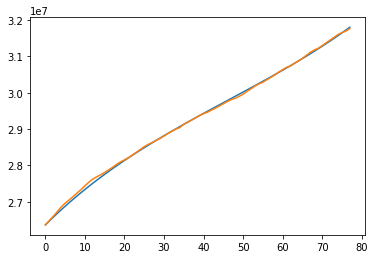

In [ ]:
def predict_var_t_curve(t, b, m):
  ret = odeint(deriv, y0, t, args=(b, m))
  S, V, IN, RN = ret.T
  return IN + RN

y0 = S_0, V_0, IN_0, RN_0

expected_x = list(filter(lambda x: x >= 0, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]

expected_n_y = [cases_t[v] for v in expected_x]

fit = curve_fit(predict_var_t_curve, expected_x, expected_n_y, bounds=(0, 1))
print(fit[0])

ret = odeint(deriv, y0, expected_x, args=tuple(fit[0]))
S, V, I, R = ret.T

plt.plot(expected_x, I + R)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR Model Vars and Normal

In [ ]:
IV_0 = IB17_0 + IP_0 + IB351_0
print(IV_0)

RV_0 = RB17_0 + RP_0 + RB351_0
print(RV_0)

276
195


In [ ]:
g = 1/num

# Assumed higher rate of variant transmission
t_factor = 1.3

# Use normal case transfer as per above
b = 0.07168199

# Define differential equation
def deriv(y, t, m1, m2):
  S, V, IN, IV, RN, RV = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (t_factor * b * IV * S / N)
  dVdt = num_vac_slope(t) - (m1 * IN * V / N) - (m2 * IV * V / N)
  dINdt = (b * IN * S / N) + (m1 * IN * V / N) - g * IN
  dIVdt = (t_factor * b * IV * S / N) + (m2 * IV * V / N) - g * IV
  dRNdt = g * IN
  dRVdt = g * IV
  return dSdt, dVdt, dINdt, dIVdt, dRNdt, dRVdt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]

# Training size
train_size = 0.8
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_v_y = expected_v_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IV_0, RN_0, RV_0

# Error function to minimize normal and variant curve squared error
def error(vs):
  m1, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(m1, m2))
  S, V, IN, IV, RN, RV = ret.T
  vars = IV + RV
  norms = IN + RN
  frac_diff_v = ((vars - train_v_y) / train_v_y) ** 2
  frac_diff_n = ((norms - train_n_y) / train_n_y) ** 2
  return sum(frac_diff_v + frac_diff_n)

print(error([0.1719689, 0.36873252]))
print(error([0.1720, 0.3687]))

37.547752955122164
37.48363666933905


[0.16251787 0.31129585]


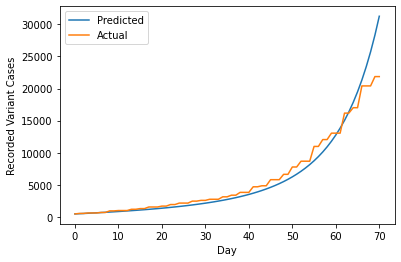

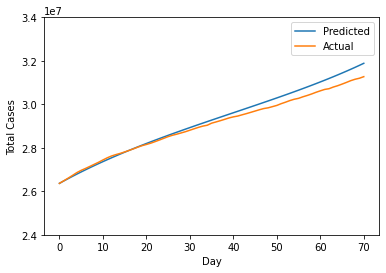

In [ ]:
from scipy.optimize import minimize

# Find the parameters that minimize overal squared error
res = minimize(error, [0.1, 0.2], bounds=[(0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.ylabel("Recorded Variant Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.ylim((2.4e7, 3.4e7))
plt.ylabel("Total Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

# SIR Model Vars Fixed Normal

Here, we used the S to I and V to I transfer rate that we got from just fitting the normal curve under "Sanity Check". This is because the number of normal cases to recorded variant cases is so different that the recorded variant cases won't greatly affect the normal cases curve.

In [ ]:
g = 1/num
b = 0.07167772
m = 0.15044847

def deriv(y, t, b1, m1):
  S, V, IN, IV, RN, RV = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (b1 * IV * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) - (m1 * IV * V / N)
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dIVdt = (b1 * IV * S / N) + (m1 * IV * V / N) - g * IV
  dRNdt = g * IN
  dRVdt = g * IV
  return dSdt, dVdt, dINdt, dIVdt, dRNdt, dRVdt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_v_y = [sum(var_t[v]) for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]


train_size = 0.8
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_v_y = expected_v_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IV_0, RN_0, RV_0

def error(vs):
  m1, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(m1, m2))
  S, V, IN, IV, RN, RV = ret.T
  vars = IV + RV
  norms = IN + RN
  frac_diff_v = ((vars - train_v_y) / train_v_y) ** 2
  frac_diff_n = ((norms - train_n_y) / train_n_y) ** 2
  return sum(frac_diff_v + frac_diff_n)

print(error([0.51737301, 0.35133384]))
print(error([0.1, 0.27167919]))

24801015529.03406
6.310323679921122


[0.13789703 0.22007041]


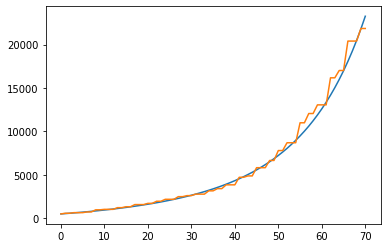

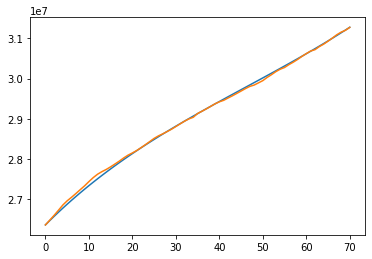

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [0.1, 0.2], bounds=[(0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR Model P1 Variant

In [ ]:
print(IP_0)
print(RP_0)

1
0


In [ ]:
g = 1/num
t_factor = 1.3
b = 0.07167772

def deriv(y, t, m1, m2):
  S, V, IN, IP, RN, RP = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (t_factor * b * IP * S / N)
  dVdt = num_vac_slope(t) - (m1 * IN * V / N) - (m2 * IP * V / N)
  dINdt = (b * IN * S / N) + (m1 * IN * V / N) - g * IN
  dIPdt = (t_factor * b * IP * S / N) + (m2 * IP * V / N) - g * IP
  dRNdt = g * IN
  dRPdt = g * IP
  return dSdt, dVdt, dINdt, dIPdt, dRNdt, dRPdt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_v_y = [var_t[v][1] for v in expected_x]
expected_n_y = [cases_t[v] for v in expected_x]


train_size = 1
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_v_y = expected_v_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IP_0, RN_0, RP_0

def error(vs):
  m1, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(m1, m2))
  S, V, IN, IP, RN, RP = ret.T
  vars = IP + RP
  norms = IN + RN
  frac_diff_v = ((vars - train_v_y) / train_v_y) ** 2
  frac_diff_n = ((norms - train_n_y) / train_n_y) ** 2
  return sum(frac_diff_v + frac_diff_n)

print(error([0.51737301, 0.35133384]))
print(error([0.1, 0.27167919]))

243.12011598077999
23.287579246076447


[0.15703772 0.41602759]


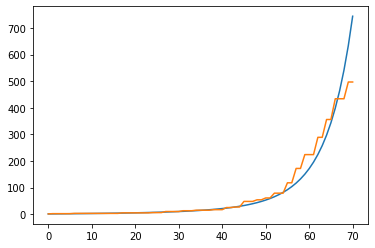

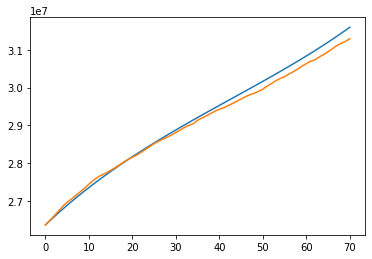

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [0.1, 0.2], bounds=[(0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IV, RN, RV = ret.T
plt.plot(expected_x, IV + RV)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR P1 Fixed

In [ ]:
g = 1/num
b = 0.07167772
m = 0.15044847

def deriv(y, t, b1, m1):
  S, V, IN, IP, RN, RP = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (b1 * IP * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) - (m1 * IP * V / N)
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dIPdt = (b1 * IP * S / N) + (m1 * IP * V / N) - g * IP
  dRNdt = g * IN
  dRPdt = g * IP
  return dSdt, dVdt, dINdt, dIPdt, dRNdt, dRPdt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_v_y = [var_t[v][1] for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]


train_size = 1
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_v_y = expected_v_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IP_0, RN_0, RP_0

def error(vs):
  b1, m1 = vs
  ret = odeint(deriv, y0, train_x, args=(b1, m1))
  S, V, IN, IP, RN, RP = ret.T
  vars = IP + RP
  norms = IN + RN
  frac_diff_v = ((vars - train_v_y) / train_v_y) ** 2
  frac_diff_n = ((norms - train_n_y) / train_n_y) ** 2
  return sum(frac_diff_v + frac_diff_n)

print(error([0.51737301, 0.35133384]))
print(error([0.1, 0.27167919]))

9708806410484.453
26.633620478629066


[0.11163283 0.40419755]


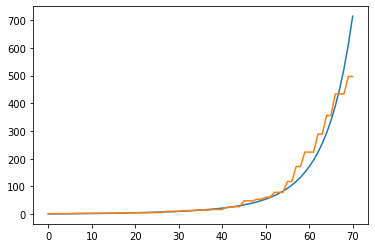

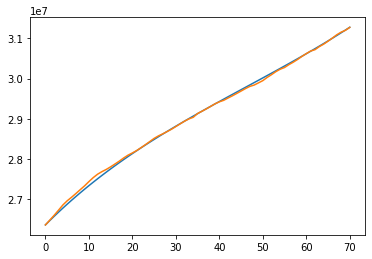

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [0.1, 0.2], bounds=[(0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IP, RN, RP = ret.T
plt.plot(expected_x, IP + RP)
plt.plot(expected_x, expected_v_y)
plt.show()

plt.plot(expected_x, IN + RN)
plt.plot(expected_x, expected_n_y)
plt.show()

# SIR P1 and B351 Fixed Transmission

In [ ]:
g = 1/num
b = 0.07167772
m = 0.15044847

def deriv(y, t, t_factor, m1, m2):
  S, V, IN, IP, IB351, RN, RP, RB351 = y
  b1 = t_factor * b
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (b1 * IP * S / N) - (b1 * IB351 * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) - (m1 * IP * V / N) - (m2 * IB351 * V / N)
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dIPdt = (b1 * IP * S / N) + (m1 * IP * V / N) - g * IP
  dIB351dt = (b1 * IB351 * S / N) + (m2 * IB351 * V / N) - g * IB351
  dRNdt = g * IN
  dRPdt = g * IP
  dRB351dt = g * IB351
  return dSdt, dVdt, dINdt, dIPdt, dIB351dt, dRNdt, dRPdt, dRB351dt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_p_y = [var_t[v][1] for v in expected_x]
expected_b351_y = [var_t[v][2] for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]


train_size = 1
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_p_y = expected_p_y[: int(np.floor(len(expected_x) * train_size))]
train_b351_y = expected_b351_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IP_0, IB351_0, RN_0, RP_0, RB351_0

def error(vs):
  t, m1, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(t, m1, m2))
  S, V, IN, IP, IB351, RN, RP, RB351 = ret.T
  P = IP + RP
  B351 = IB351 + RB351
  norms = IN + RN
  frac_diff_p = ((P - train_p_y) / train_p_y) ** 2
  frac_diff_b351 = ((B351 - train_b351_y) / train_b351_y) ** 2
  return sum(frac_diff_p + frac_diff_b351)

print(error([1.2, 0.35133384, 0.51737301]))
print(error([1.3, 0.27167919, 0.1]))

509.57435119412924
75.83052676563976


[1.97563965 0.30993798 0.27673758]


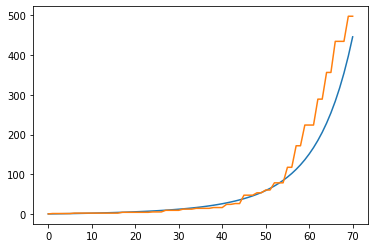

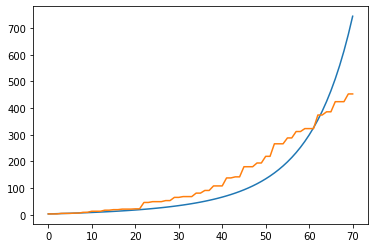

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [1.2, 0.2, 0.2], bounds=[(1, 2), (0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IP, IB351, RN, RP, RB351 = ret.T
plt.plot(expected_x, IP + RP)
plt.plot(expected_x, expected_p_y)
plt.show()

plt.plot(expected_x, IB351 + RB351)
plt.plot(expected_x, expected_b351_y)
plt.show()

# P1 and B351 Unfixed

Here, we did not fix any transmission coefficients and the result is that curves perform significantly worse outside of the training range since the large number of parameters overfit.

In [ ]:
g = 1/num
b = 0.07167772
m = 0.15044847

def deriv(y, t, b1, m1, b2, m2):
  S, V, IN, IP, IB351, RN, RP, RB351 = y
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (b1 * IP * S / N) - (b2 * IB351 * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) - (m1 * IP * V / N) - (m2 * IB351 * S / N)
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dIPdt = (b1 * IP * S / N) + (m1 * IP * V / N) - g * IP
  dIB351dt = (b2 * IB351 * S / N) + (m2 * IB351 * V / N) - g * IB351
  dRNdt = g * IN
  dRPdt = g * IP
  dRB351dt = g * IB351
  return dSdt, dVdt, dINdt, dIPdt, dIB351dt, dRNdt, dRPdt, dRB351dt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_p_y = [var_t[v][1] for v in expected_x]
expected_b351_y = [var_t[v][2] for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]


train_size = 0.75
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_p_y = expected_p_y[: int(np.floor(len(expected_x) * train_size))]
train_b351_y = expected_b351_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IP_0, IB351_0, RN_0, RP_0, RB351_0

def error(vs):
  b1, m1, b2, m2 = vs
  ret = odeint(deriv, y0, train_x, args=(b1, m1, b2, m2))
  S, V, IN, IP, IB351, RN, RP, RB351 = ret.T
  P = IP + RP
  B351 = IB351 + RB351
  norms = IN + RN
  frac_diff_p = ((P - train_p_y) / train_p_y) ** 2
  frac_diff_b351 = ((B351 - train_b351_y) / train_b351_y) ** 2
  return sum(frac_diff_p + frac_diff_b351)

print(error([0.51737301, 0.35133384, 0.51737301, 0.35133384]))
print(error([0.1, 0.27167919, 0.1, 0.27167919]))

965795544849.6111
34.35216064129931


[0.09427523 0.47518222 0.199698   0.1294798 ]


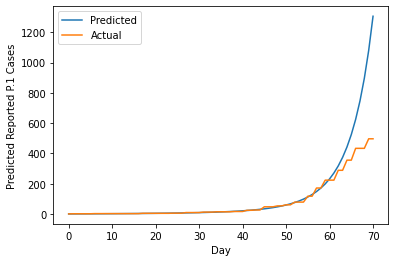

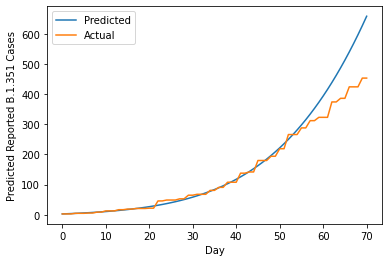

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [0.1, 0.2, 0.1, 0.2], bounds=[(0, 1), (0, 1), (0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IP, IB351, RN, RP, RB351 = ret.T
plt.plot(expected_x, IP + RP)
plt.plot(expected_x, expected_p_y)
plt.ylabel("Predicted Reported P.1 Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

plt.plot(expected_x, IB351 + RB351)
plt.plot(expected_x, expected_b351_y)
plt.ylabel("Predicted Reported B.1.351 Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

# SIR Model All 3 Fixed Transmission

All three variants are included here with the assumption that they all have the same transmission rate.

In [ ]:
print(IB17_0)
print(IP_0)
print(IB351_0)

272
1
3


In [ ]:
g = 1/num
b = 0.07167772
m = 0.15044847

def deriv(y, t, t_factor, m1, m2, m3):
  S, V, IN, IP, IB351, IB17, RN, RP, RB351, RB17 = y
  b1 = t_factor * b
  dSdt = -num_vac_slope(t) - (b * IN * S / N) - (b1 * IP * S / N) - (b1 * IB351 * S / N) - (b1 * IB17 * S / N)
  dVdt = num_vac_slope(t) - (m * IN * V / N) - (m1 * IP * V / N) - (m2 * IB351 * V / N) - (m3 * IB17 * V / N)
  dINdt = (b * IN * S / N) + (m * IN * V / N) - g * IN
  dIPdt = (b1 * IP * S / N) + (m1 * IP * V / N) - g * IP
  dIB351dt = (b1 * IB351 * S / N) + (m2 * IB351 * V / N) - g * IB351
  dIB17dt = (b1 * IB17 * S / N) + (m3 * IB17 * V / N) - g * IB17
  dRNdt = g * IN
  dRPdt = g * IP
  dRB351dt = g * IB351
  dRB17dt = g * IB17
  return dSdt, dVdt, dINdt, dIPdt, dIB351dt, dIB17dt, dRNdt, dRPdt, dRB351dt, dRB17dt

In [ ]:
expected_x = list(filter(lambda x: x >= 0 and x <= 70, [v for v in var_t]))
expected_b17_y = [var_t[v][0] for v in expected_x]
expected_p_y = [var_t[v][1] for v in expected_x]
expected_b351_y = [var_t[v][2] for v in expected_x]
expected_n_y = [case_c_t[v] for v in expected_x]


train_size = 1
train_x = expected_x[: int(np.floor(len(expected_x) * train_size))]
train_p_y = expected_p_y[: int(np.floor(len(expected_x) * train_size))]
train_b351_y = expected_b351_y[: int(np.floor(len(expected_x) * train_size))]
train_b17_y = expected_b17_y[: int(np.floor(len(expected_x) * train_size))]
train_n_y = expected_n_y[: int(np.floor(len(expected_x) * train_size))]

y0 = S_0, V_0, IN_0, IP_0, IB351_0, IB17_0, RN_0, RP_0, RB351_0, RB17_0

def error(vs):
  t, m1, m2, m3 = vs
  ret = odeint(deriv, y0, train_x, args=(t, m1, m2, m3))
  S, V, IN, IP, IB351, IB17, RN, RP, RB351, RB17 = ret.T
  P = IP + RP
  B351 = IB351 + RB351
  B17 = IB17 + RB17
  norms = IN + RN
  frac_diff_p = ((P - train_p_y) / train_p_y) ** 2
  frac_diff_b351 = ((B351 - train_b351_y) / train_b351_y) ** 2
  frac_diff_b17 = ((B17 - train_b17_y) / train_b17_y) ** 2
  return sum(frac_diff_p + frac_diff_b351 + frac_diff_b17)

print(error([1.2, 0.35133384, 0.51737301, 0.3]))
print(error([1.3, 0.27167919, 0.1, 0.15]))

522.5919881183523
103.1588076691167


[1.94957881 0.31652241 0.28149267 0.21387131]


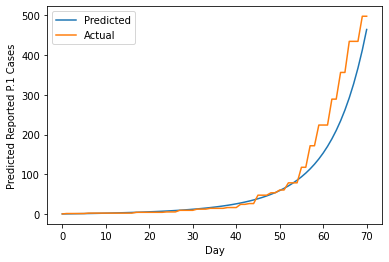

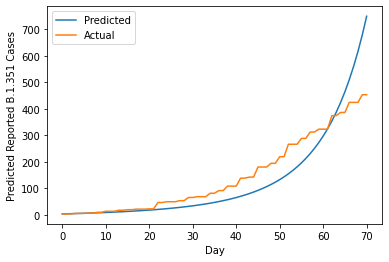

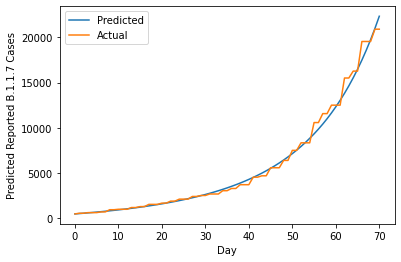

In [ ]:
from scipy.optimize import minimize

res = minimize(error, [1.2, 0.05, 0.05, 0.05], bounds=[(1, 2), (0, 1), (0, 1), (0, 1)])

ret = odeint(deriv, y0, expected_x, args=tuple(res.x))
print(res.x)
S, V, IN, IP, IB351, IB17, RN, RP, RB351, RB17 = ret.T
plt.plot(expected_x, IP + RP)
plt.plot(expected_x, expected_p_y)
plt.ylabel("Predicted Reported P.1 Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

plt.plot(expected_x, IB351 + RB351)
plt.plot(expected_x, expected_b351_y)
plt.ylabel("Predicted Reported B.1.351 Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()

plt.plot(expected_x, IB17 + RB17)
plt.plot(expected_x, expected_b17_y)
plt.ylabel("Predicted Reported B.1.1.7 Cases")
plt.xlabel("Day")
plt.legend(("Predicted", "Actual"))
plt.show()